# [Workshop] Analogical Reasoning using kNN

# 0. Installation

In [1]:
# !pip install scikit-learn==0.23.1

# 1. Import Library

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing # processing.scale // for scaling continuous variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2. Check Data

In [3]:
# Loading the dataset
# ASD_data = pd.read_csv('./data.csv')
ASD_data = pd.read_csv('./Toddler Autism dataset.csv')

# Print the first 5 rows of the dataframe.
print(ASD_data.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1     

In [4]:
# Replace special 
ASD_data.columns=ASD_data.columns.str.replace('-','_')
ASD_data.columns=ASD_data.columns.str.replace('/','_')
ASD_data.columns=ASD_data.columns.str.replace(' ','_')
print(ASD_data.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat_10_Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who_completed_the_test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class_ASD_Traits_  
0                No  
1     

In [5]:
# observing the shape of the data
print(ASD_data.shape)

(1054, 19)


# 3. Data Preprocessing

## 3.1. Choose appropriate features 

In [6]:
Sex = pd.Categorical(pd.Categorical(ASD_data['Sex']).codes)
Ethnicity = pd.Categorical(pd.Categorical(ASD_data['Ethnicity']).codes)
Jaundice = pd.Categorical(pd.Categorical(ASD_data['Jaundice']).codes)
Family_mem_with_ASD = pd.Categorical(pd.Categorical(ASD_data['Family_mem_with_ASD']).codes)
Class_ASD_Traits_ = pd.Categorical(pd.Categorical(ASD_data['Class_ASD_Traits_']).codes)

ASD_data['Sex'] = Sex
ASD_data['Ethnicity'] = Ethnicity
ASD_data['Jaundice'] = Jaundice
ASD_data['Family_mem_with_ASD'] = Family_mem_with_ASD
ASD_data['Class_ASD_Traits_'] = Class_ASD_Traits_
# ASD_data['Age_Mons'] = (ASD_data['Age_Mons'] - min(ASD_data['Age_Mons'])) / (max(ASD_data['Age_Mons']) - min(ASD_data['Age_Mons']))

# Check the data and think why we drop these variables?
X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score', 'Class_ASD_Traits_'], axis=1)


In [7]:
ASD_data['Sex']

0       0
1       1
2       1
3       1
4       0
       ..
1049    0
1050    1
1051    1
1052    1
1053    1
Name: Sex, Length: 1054, dtype: category
Categories (2, int64): [0, 1]

In [8]:
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0,5,0,1
1050,0,0,1,1,1,0,1,0,1,0,12,1,7,1,0
1051,1,0,1,1,1,1,1,1,1,1,18,1,8,1,0
1052,1,0,0,0,0,0,0,1,0,1,19,1,5,0,1


## 3.2 Choose target

In [9]:
Y_classification = ASD_data.Class_ASD_Traits_

# 4. Build KNN Model

## 4.1 Split the dataset into training set and test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 5, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

(843, 15)
(211, 15)


## 4.2 Build KNN Model (k=?)

In [11]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.957
Score in test set: 0.948


## 4.3. Use grid search to optimize the parameters

In [12]:
test_scores = []
train_scores = []

# Grid search and find the optimal parameter (N neighborhoods)
for i in range(2, 20):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)

    train_scores.append(knn_classifier.score(X_train, y_train))
    test_scores.append(knn_classifier.score(X_test, y_test))

# Print the best model index
max_train_score = max(train_scores)
print('The best k (train score) is', train_scores.index(max_train_score)+2)

max_test_score = max(test_scores)
print('The best k (test  score) is', test_scores.index(max_test_score)+2)

The best k (train score) is 3
The best k (test  score) is 5


In [13]:
for i in range(0, len(train_scores)):
    print('k = {0} - Train Accuracy = {1:.3f}'.format(i+2, train_scores[i]))

k = 2 - Train Accuracy = 0.935
k = 3 - Train Accuracy = 0.963
k = 4 - Train Accuracy = 0.944
k = 5 - Train Accuracy = 0.957
k = 6 - Train Accuracy = 0.945
k = 7 - Train Accuracy = 0.955
k = 8 - Train Accuracy = 0.943
k = 9 - Train Accuracy = 0.938
k = 10 - Train Accuracy = 0.936
k = 11 - Train Accuracy = 0.936
k = 12 - Train Accuracy = 0.938
k = 13 - Train Accuracy = 0.935
k = 14 - Train Accuracy = 0.930
k = 15 - Train Accuracy = 0.929
k = 16 - Train Accuracy = 0.928
k = 17 - Train Accuracy = 0.928
k = 18 - Train Accuracy = 0.923
k = 19 - Train Accuracy = 0.923


In [14]:
for i in range(0, len(test_scores)):
    print('k = {0} - Test Accuracy = {1:.3f}'.format(i+2, test_scores[i]))

k = 2 - Test Accuracy = 0.891
k = 3 - Test Accuracy = 0.929
k = 4 - Test Accuracy = 0.934
k = 5 - Test Accuracy = 0.948
k = 6 - Test Accuracy = 0.938
k = 7 - Test Accuracy = 0.948
k = 8 - Test Accuracy = 0.934
k = 9 - Test Accuracy = 0.943
k = 10 - Test Accuracy = 0.938
k = 11 - Test Accuracy = 0.929
k = 12 - Test Accuracy = 0.934
k = 13 - Test Accuracy = 0.934
k = 14 - Test Accuracy = 0.934
k = 15 - Test Accuracy = 0.929
k = 16 - Test Accuracy = 0.934
k = 17 - Test Accuracy = 0.934
k = 18 - Test Accuracy = 0.924
k = 19 - Test Accuracy = 0.919


In [15]:
knn_classifier=KNeighborsClassifier(n_neighbors=3) # k = 3
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.963
Score in test set: 0.929


In [16]:
knn_classifier=KNeighborsClassifier(n_neighbors=17) # k = 17
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.928
Score in test set: 0.934


# 5. Visualize the performance

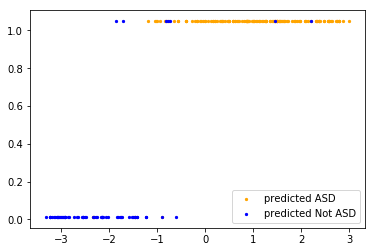

In [17]:
# Visualize the result of KNN with LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_new = lda.fit_transform(X_test, y_test)

y_test_new = y_test.apply(lambda x:x + np.random.uniform(-0.1,0.1))

plt.scatter(X_new[knn_classifier.predict(X_test) == 1], y_test_new[knn_classifier.predict(X_test) == 1], marker='o', c='orange', s=5)
plt.scatter(X_new[knn_classifier.predict(X_test) == 0], y_test_new[knn_classifier.predict(X_test) == 0], marker='o', c='blue', s=5)

plt.legend(['predicted ASD', 'predicted Not ASD'], loc='best')
plt.show()

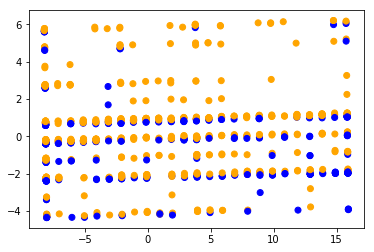

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
color = []
for y in Y_classification:
    color.append('orange' if y == 1 else 'b')
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=color) # Orange: ASD; Blue Not ASD;
plt.show()

---

# 6. Workshop

In [60]:
# kNN is very sensitive to the distance between two samples, which has mutiple variables/features
# Therefore, we have to carefully preprocess our training samples. 
# In earlier code example, 
# (1) Scaling part is missing, e.g. feature: ASD_data['Age_Mons']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ASD_data['Age_Mons'] = scaler.fit_transform(ASD_data[['Age_Mons']])
# (2) For multi-values categorical variable, we should use dummy encoding (one-hot vector), which is also missing. 
import pandas as pd
encode_sex = pd.get_dummies(ASD_data['Sex'], prefix='Sex')
encode_ethnicity = pd.get_dummies(ASD_data['Ethnicity'], prefix='Ethnicity')
encode_jaundice = pd.get_dummies(ASD_data['Jaundice'], prefix='Jaundice')
encode_asd_hx = pd.get_dummies(ASD_data['Family_mem_with_ASD'], prefix='Family_ASD_Hx')
encoded_parameters = [encode_sex, encode_ethnicity, encode_jaundice, encode_asd_hx]
for param in encoded_parameters:
    for col in param:
        ASD_data[col] = param[col]
# You should enhance above code, then re-fit the kNN model to improve the classification accuracy.
#
#
#
# Chang Siang: Drop the columns that has been convered to one-hot encoding columns
X = X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score', 'Class_ASD_Traits_', 
                       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD'], axis=1)
# Print to inspect the data visually
print(X)

      A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  Ethnicity_5  Ethnicity_6  \
0      0   0   0   0   0   0   1   1   0    1  ...            0            0   
1      1   1   0   0   0   1   1   0   0    0  ...            1            0   
2      1   0   0   0   0   0   1   1   0    1  ...            0            0   
3      1   1   1   1   1   1   1   1   1    1  ...            0            0   
4      1   1   0   1   1   1   1   1   1    1  ...            1            0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...          ...          ...   
1049   0   0   0   0   0   0   0   0   0    1  ...            1            0   
1050   0   0   1   1   1   0   1   0   1    0  ...            0            0   
1051   1   0   1   1   1   1   1   1   1    1  ...            0            0   
1052   1   0   0   0   0   0   0   1   0    1  ...            1            0   
1053   1   1   0   0   1   1   0   1   1    0  ...            0            1   

      Ethnicity_7  Ethnicity_8  Ethnici

In [61]:
# Run kNN again
test_scores = []
train_scores = []

# Grid search and find the optimal parameter (N neighborhoods)
for i in range(2, 20):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)

    train_scores.append(knn_classifier.score(X_train, y_train))
    test_scores.append(knn_classifier.score(X_test, y_test))

# Print the best model index
max_train_score = max(train_scores)
print('The best k (train score) is', train_scores.index(max_train_score)+2)

max_test_score = max(test_scores)
print('The best k (test  score) is', test_scores.index(max_test_score)+2)

The best k (train score) is 3
The best k (test  score) is 5


In [62]:
knn_classifier=KNeighborsClassifier(n_neighbors=3) # k = 3
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.963
Score in test set: 0.929


---

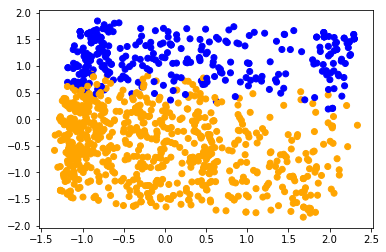

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
color = []
for y in Y_classification:
    color.append('orange' if y == 1 else 'b')
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=color) # Orange: ASD; Blue Not ASD;
plt.show()

---
`The end is also called then new start.` --- ISS : **I** **S**(elf) **S**(tudy)

---